In [1]:
# Step 1: Download the dataset
import pandas as pd
df = pd.read_csv('C:/Users/PC/Downloads/Housing.csv')
df 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


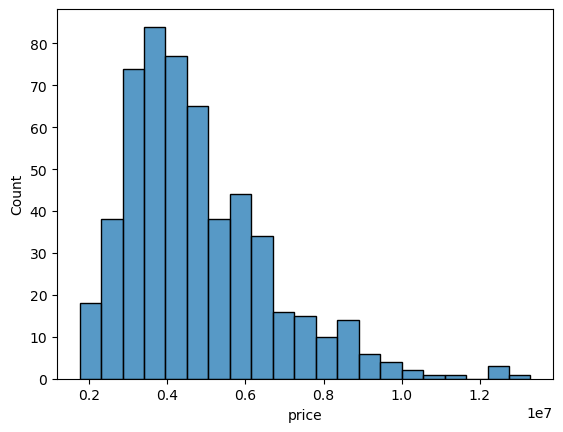

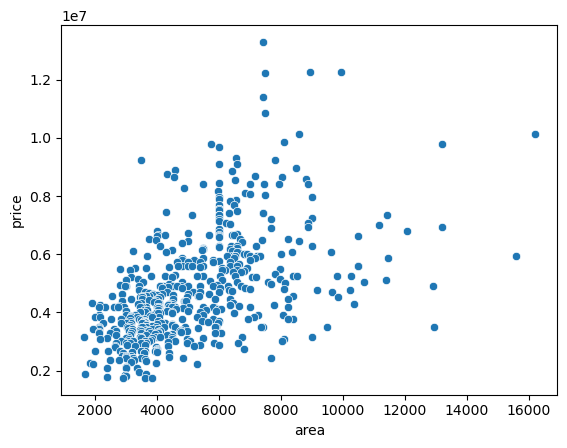

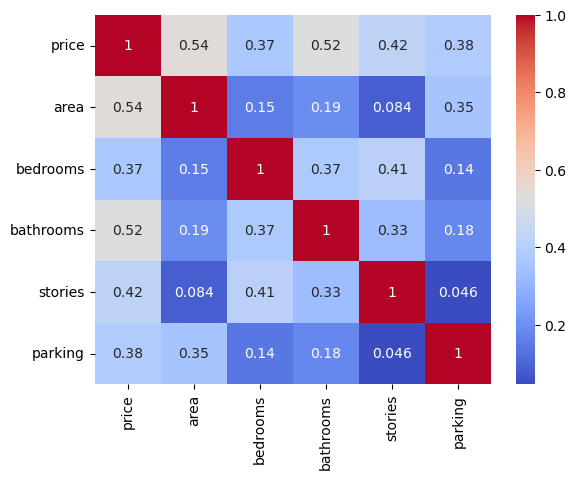

In [2]:
# Step 3: Perform Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
sns.histplot(df['price'])
plt.show()

# Bi-Variate Analysis
sns.scatterplot(x='area', y='price', data=df)
plt.show()

# Multi-Variate Analysis
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
# Step 4: Perform descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [4]:
# Step 5: Check for missing values and deal with them
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [7]:
# Step 6: Find outliers and replace them
from scipy import stats
import numpy as np
z_scores = stats.zscore(df['price'])
threshold = 3
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
df['price'] = np.where((z_scores > threshold) | (z_scores < -threshold), df['price'].median(), df['price'])

In [8]:
# Step 7: Check for categorical columns and perform encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']
df_encoded = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'furnishingstatus'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

In [11]:
# Step 8: Split the data into dependent and independent variables
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']
x
y

0      4340000.0
1      4340000.0
2      4340000.0
3      4340000.0
4      4340000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

In [13]:
# Step 9: Scale the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
# Step 10: Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Step 11: Build the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Step 12: Train the Model
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Step 13: Test the Model
y_pred = model.predict(x_test)
# Step 14: Measure the performance using metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean-Squared-Error:', mse)
print('R-squared-Score:', r2)

Mean-Squared-Error: 1573985002110.5876
R-squared-Score: 0.5087215192591856
